In [29]:
import torch
from torch_geometric.data import Data
from pathlib import Path
from torch.utils.data import Dataset  # not the one from PyG!
from torch_geometric.loader import DataLoader
import torch_geometric.utils
import networkx as nx

In [30]:
# test load a single .pt file
torch.load("../data/batch_1_0/data21000_s14.pt")

Data(x=[316, 6], edge_index=[2, 6634], edge_attr=[6634, 4], y=[6634])

- data.x: Node feature matrix with shape [num_nodes, num_node_features]

- data.edge_index: Graph connectivity in COO format with shape [2, num_edges] and type torch.long

- data.edge_attr: Edge feature matrix with shape [num_edges, num_edge_features]

- data.y: Target to train against (may have arbitrary shape), e.g., node-level targets of shape [num_nodes, *] or graph-level targets of shape [1, *]

In [31]:
class MyDataset():
    def __init__(self, path: Path):
        super().__init__()
        self.graphs = list(path.glob("*.pt"))
    
    def __getitem__(self, idx):
        return torch.load(self.graphs[idx])
    
    def __len__(self) -> int:
        return len(self.graphs)

BATCH_INDEX = 0

dataset = MyDataset(Path("../data/batch_1_{}/".format(BATCH_INDEX)))
loader = DataLoader(dataset, batch_size=32)
print("Number of graphs: ", dataset.__len__())
dataset.__getitem__(7)

Number of graphs:  1000


Data(x=[262, 6], edge_index=[2, 2532], edge_attr=[2532, 4], y=[2532])

In [37]:

def test_visualise(graph):
    g = torch_geometric.utils.to_networkx(graph, to_undirected=True)
    nx.draw_networkx(g)

hello


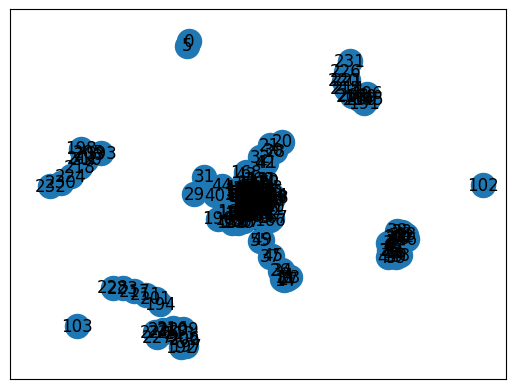

In [38]:
test_visualise(dataset.__getitem__(6))


In [34]:
type(loader)

torch_geometric.loader.dataloader.DataLoader

In [36]:
for batch in loader:
    print(batch)
    print(batch.num_graphs)
    data = batch[0]  # Get the first graph object.

    print(data)
    print('==============================================================')

    # Gather some statistics about the graph.
    print(f'Number of nodes: {data.num_nodes}')
    print(f'Number of edges: {data.num_edges}')
    print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
    print(f'Number of node features: {data.num_features}')
    print(f'Number of edge features: {data.edge_attr.shape[1]}')

    # print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
    print(f'Has isolated nodes: {data.has_isolated_nodes()}')
    print(f'Has self-loops: {data.has_self_loops()}')
    print(f'Is undirected: {data.is_undirected()}')
    break

DataBatch(x=[9761, 6], edge_index=[2, 133106], edge_attr=[133106, 4], y=[133106], batch=[9761], ptr=[33])
32
Data(x=[350, 6], edge_index=[2, 8138], edge_attr=[8138, 4], y=[8138])
Number of nodes: 350
Number of edges: 8138
Average node degree: 23.25
Number of node features: 6
Number of edge features: 4
Has isolated nodes: True
Has self-loops: False
Is undirected: False
